© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
import numpy as np # type: ignore
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_save_pdf # type: ignore

# Load FITS data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic data
time = hdul[1].data # Time array, saved in the second HDU (Extension HDU 1)
hdul.close()

# Computed POD modes using WaLSAtools
pod_results = WaLSAtools(signal=signal_3d, time=time, method='pod', num_modes=10)

Starting POD analysis ....
Processing a 3D cube with shape (200, 130, 130).
POD analysis completed.
Top 10 frequencies and normalized power values:
[[0.1, 1.0], [0.15, 0.7], [0.25, 0.61], [0.2, 0.54], [0.3, 0.47], [0.5, 0.39], [0.35, 0.32], [0.4, 0.25], [0.45, 0.24], [0.55, 0.18]]
Total variance contribution of the first 10 modes: 96.01%

---- POD/SPOD Results Summary ----

input_data (ndarray, Shape: (200, 130, 130)): Original input data, mean subtracted (Shape: (Nt, Ny, Nx))
spatial_mode (ndarray, Shape: (200, 130, 130)): Reshaped spatial modes matching the dimensions of the input data (Shape: (Nmodes, Ny, Nx))
temporal_coefficient (ndarray, Shape: (200, 200)): Temporal coefficients associated with each spatial mode (Shape: (Nmodes, Nt))
eigenvalue (ndarray, Shape: (200,)): Eigenvalues corresponding to singular values squared (Shape: (Nmodes))
eigenvalue_contribution (ndarray, Shape: (200,)): Eigenvalue contribution of each mode (Shape: (Nmodes))
cumulative_eigenvalues (list, Shape: 

In [2]:
spatial_modes = pod_results['spatial_mode']
temporal_coefficients = pod_results['temporal_coefficient']

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/FigS5_POD_analysis.pdf'


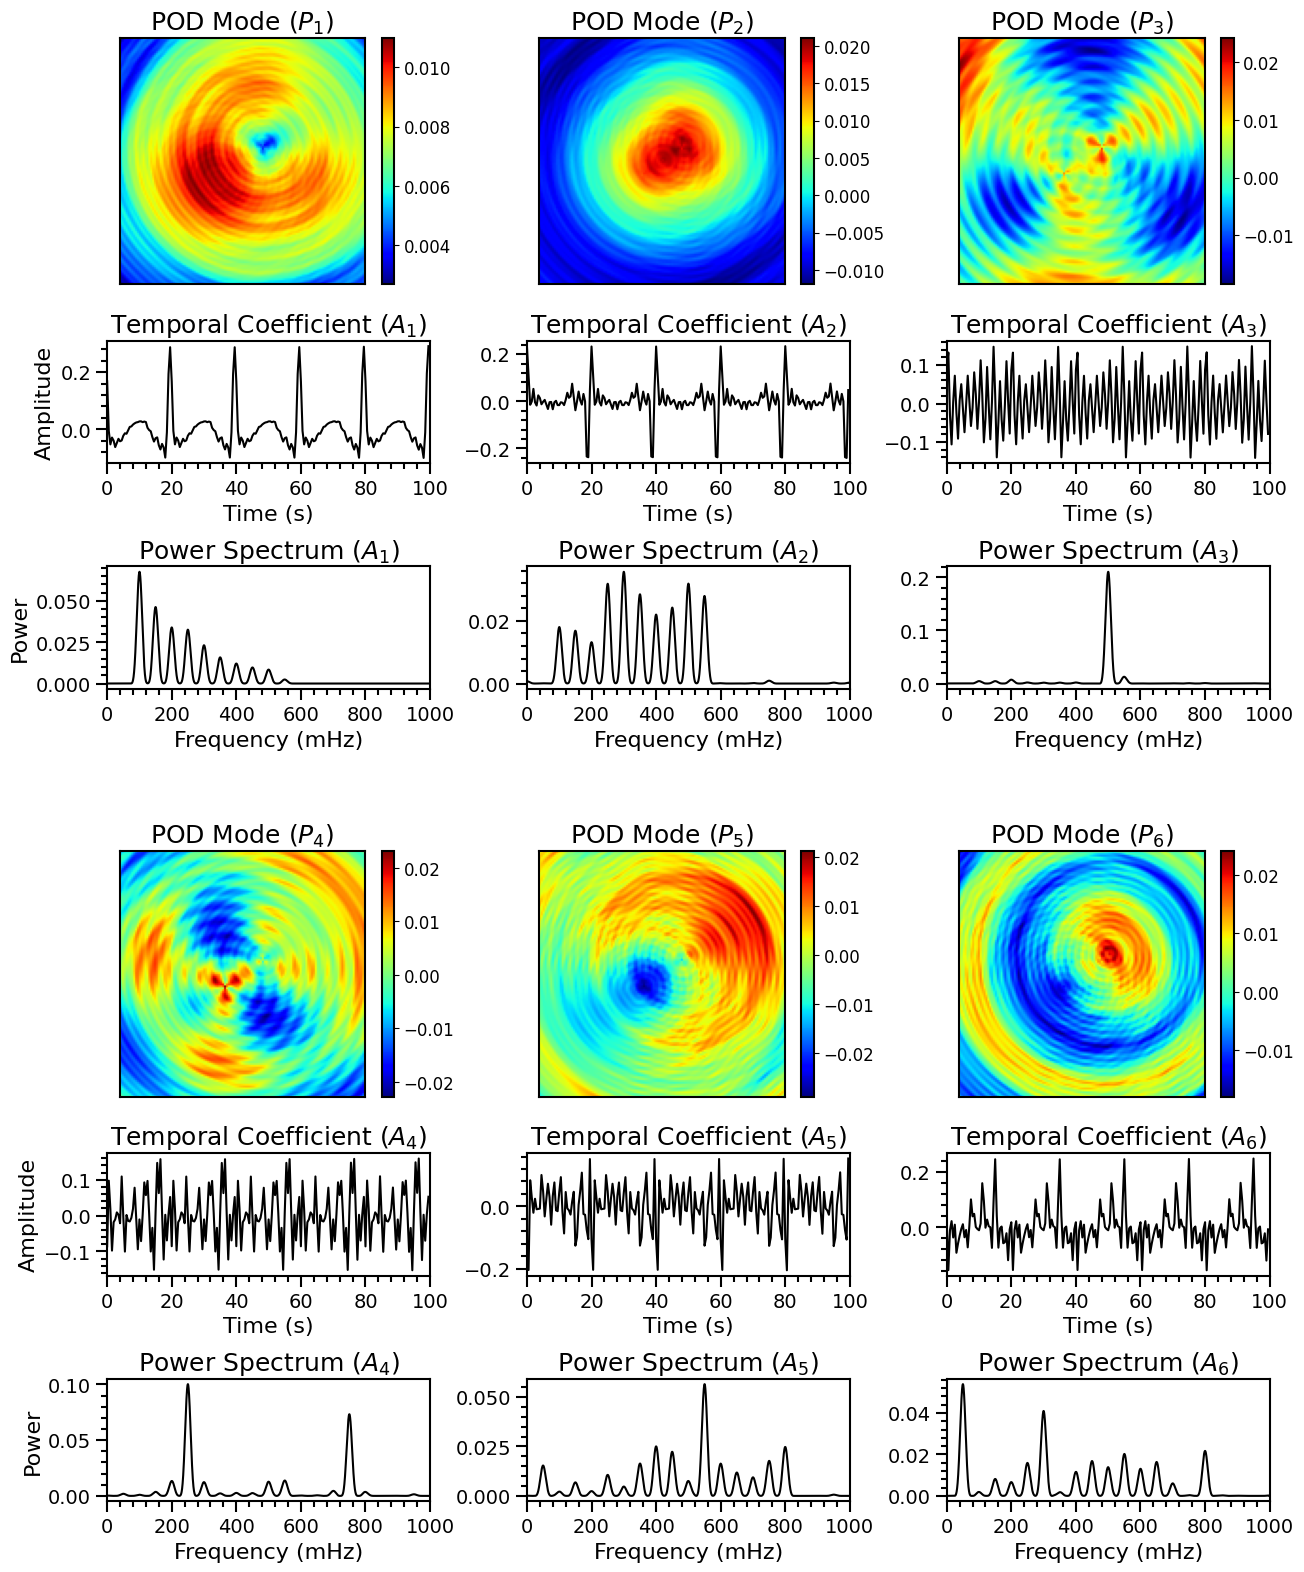

In [3]:
import matplotlib.pyplot as plt # type: ignore
import matplotlib.gridspec as gridspec # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
from scipy.signal import welch # type: ignore

# Setting global parameters
plt.rcParams.update({
    'font.size': 14,          # Global font size
    'axes.titlesize': 18,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 20,   # Figure title font size
    'axes.grid': False,       # Turn off grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
})

fig = plt.figure(figsize=(15, 19))  # Create a figure with specified size

# Create subplots with GridSpec
gs1 = gridspec.GridSpec(9, 3, height_ratios=[1, 0.5, -0.04, 0.5, 0.2, 1, 0.5, -0.04, 0.5], figure=fig, hspace=0.5, wspace=0.3)

# Plot each column of p as an image in a subplot
for m in range(3):  # First set of 3 modes
    ax_img = plt.subplot(gs1[0, m])
    ax_img.set_title(f'POD Mode ($P_{m+1}$)')
    img = ax_img.imshow(spatial_modes[m, :, :], cmap='jet', aspect='equal', origin='lower')
    colorbar = plt.colorbar(img, ax=ax_img, orientation='vertical', shrink=1.0)
    colorbar.outline.set_linewidth(1.5)
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    for spine in ax_img.spines.values():
        spine.set_linewidth(1.5)

    ax_line = plt.subplot(gs1[1, m])
    ax_line.plot(time, temporal_coefficients[m, :], 'k')
    ax_line.set_title(f'Temporal Coefficient ($A_{m+1}$)')
    ax_line.set_xlabel('Time (s)')  # X label
    if m == 0:
        ax_line.set_ylabel('Amplitude')  # Y label
    ax_line.tick_params(axis='y', labelsize=8)  # Adjust y tick label size
    ax_line.grid(False)  # Turn off grid
    ax_line.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_line.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_line.tick_params(axis='both', labelsize=14)
    for spine in ax_line.spines.values():
        spine.set_linewidth(1.5)
    ax_line.set_xlim(0, 100)

    ax_welch = plt.subplot(gs1[3, m])
    f, px = welch(temporal_coefficients[m, :] - np.mean(temporal_coefficients[m, :]), nperseg=150, noverlap=25, nfft=2**14, fs=2)
    ax_welch.plot(f * 1000., px, 'k')
    ax_welch.set_title(f'Power Spectrum ($A_{m+1}$)')
    ax_welch.set_xlabel('Frequency (mHz)')  # X label
    if m == 0:
        ax_welch.set_ylabel('Power')  # Y label
    ax_welch.tick_params(axis='y', labelsize=8)  # Adjust y tick label size
    ax_welch.grid(False)  # Turn off grid
    ax_welch.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_welch.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_welch.tick_params(axis='both', labelsize=14)
    for spine in ax_welch.spines.values():
        spine.set_linewidth(1.5)
    ax_welch.set_xlim(0, 1000)

# Create a separate GridSpec for the spacing between the two sets
gs_space = gridspec.GridSpec(1, 1, top=0.98, bottom=0.95, hspace=0.5, wspace=0.5, figure=fig)

for m in range(3, 6):  # Second set of 3 modes
    row = m - 3
    col = m % 3
    ax_img = plt.subplot(gs1[5, col])
    ax_img.set_title(f'POD Mode ($P_{m+1}$)')
    img = ax_img.imshow(spatial_modes[m, :, :], cmap='jet', aspect='equal', origin='lower')
    colorbar = plt.colorbar(img, ax=ax_img, orientation='vertical', shrink=1.0)
    colorbar.outline.set_linewidth(1.5)
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    for spine in ax_img.spines.values():
        spine.set_linewidth(1.5)

    ax_line = plt.subplot(gs1[6, col])
    ax_line.plot(time, temporal_coefficients[m, :], 'k')
    ax_line.set_title(f'Temporal Coefficient ($A_{m+1}$)')
    ax_line.set_xlabel('Time (s)')  # X label
    if m == 3:
        ax_line.set_ylabel('Amplitude')  # Y label
    ax_line.tick_params(axis='y', labelsize=8)  # Adjust y tick label size
    ax_line.grid(False)  # Turn off grid
    ax_line.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_line.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_line.tick_params(axis='both', labelsize=14)
    for spine in ax_line.spines.values():
        spine.set_linewidth(1.5)
    ax_line.set_xlim(0, 100)

    ax_welch = plt.subplot(gs1[8, col])
    f, px = welch(temporal_coefficients[m, :] - np.mean(temporal_coefficients[m, :]), nperseg=150, noverlap=25, nfft=2**14, fs=2)
    ax_welch.plot(f * 1000., px, 'k')
    ax_welch.set_title(f'Power Spectrum ($A_{m+1}$)')
    ax_welch.set_xlabel('Frequency (mHz)')  # X label
    if m == 3:
        ax_welch.set_ylabel('Power')  # Y label
    ax_welch.tick_params(axis='y', labelsize=8)  # Adjust y tick label size
    ax_welch.grid(False)  # Turn off grid
    ax_welch.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_welch.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_welch.tick_params(axis='both', labelsize=14)
    for spine in ax_welch.spines.values():
        spine.set_linewidth(1.5)
    ax_welch.set_xlim(0, 1000)

# Save the figure as a PDF
pdf_path = 'Figures/FigS5_POD_analysis.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()
